## Color Selection

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import numpy as np

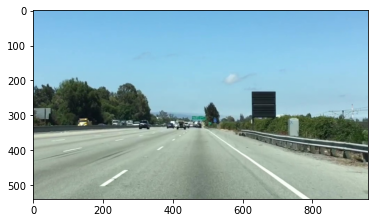

In [4]:
image = mpimg.imread('./data/test.jpg')
plt.imshow(image)

In [5]:
image.shape

(540, 960, 3)

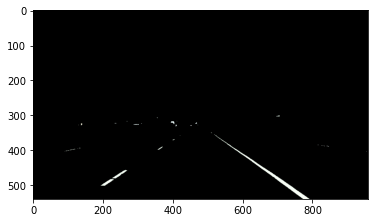

In [127]:
color_select = np.copy(image)

red_threshold = 230
green_threshold = 220
blue_threshold = 220

rgb_threshold = [red_threshold, green_threshold, blue_threshold]

thresholds = (image[:, :, 0] < rgb_threshold[0]) | (image[:, :, 1] < rgb_threshold[1]) | (image[:, :, 2] < rgb_threshold[2])

color_select[thresholds] = [0, 0, 0]
plt.imshow(color_select)

## Region Masking

In [112]:
image = mpimg.imread('./data/test.jpg')

xsize = image.shape[1]
ysize = image.shape[0]

left_bottom = [130, 539]
right_bottom = [800, 539]
apex = [480, 320]
region_select = np.copy(image)

pts = np.array([left_bottom, apex, right_bottom])

# 삼각형 각 선분의 방정식 구한 후 겹치는 부분 색칠하는 코드
fit_left = np.polyfit((left_bottom[0], apex[0]), (left_bottom[1], apex[1]), 1)  # 두 점을 지나는 직선의 기울기와 절편 반환
fit_right = np.polyfit((right_bottom[0], apex[0]), (right_bottom[1], apex[1]), 1)
fit_bottom = np.polyfit((left_bottom[0], right_bottom[0]), (left_bottom[1], right_bottom[1]), 1)

XX, YY = np.meshgrid(np.arange(0, xsize), np.arange(0, ysize))
region_thresholds = ((YY > (XX * fit_left[0] + fit_left[1])) 
                     & (YY > (XX * fit_right[0] + fit_right[1])) 
                     & (YY < (XX * fit_bottom[0] + fit_bottom[1])))

region_select[region_thresholds] = [0, 0, 255]

# cv2.fillPoly(region_select, [pts], color=[255, 0, 0])
plt.imshow(image)
plt.show()
plt.imshow(region_select)
plt.show()

## Color and Region Selection

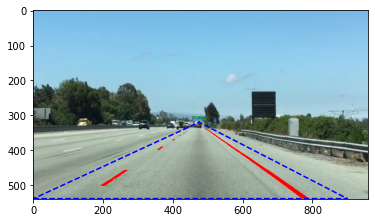

In [179]:
image = mpimg.imread('./data/test.jpg')

xsize = image.shape[1]
ysize = image.shape[0]

line_image = np.copy(image)

# ------- color --------

color_select = np.copy(image)

red_threshold = 200
green_threshold = 200
blue_threshold = 200

rgb_threshold = [red_threshold, green_threshold, blue_threshold]

color_thresholds = (image[:, :, 0] < rgb_threshold[0]) | (image[:, :, 1] < rgb_threshold[1]) | (image[:, :, 2] < rgb_threshold[2])

color_select[color_thresholds] = [0, 0, 0]

# ------ region --------

# left_bottom = [130, 539]
# right_bottom = [800, 539]
# apex = [480, 320]
left_bottom = [0, 539]
right_bottom = [900, 539]
apex = [475, 320]


region_select = np.copy(image)

# pts = np.array([left_bottom, apex, right_bottom])

fit_left = np.polyfit((left_bottom[0], apex[0]), (left_bottom[1], apex[1]), 1)  
fit_right = np.polyfit((right_bottom[0], apex[0]), (right_bottom[1], apex[1]), 1)
fit_bottom = np.polyfit((left_bottom[0], right_bottom[0]), (left_bottom[1], right_bottom[1]), 1)

XX, YY = np.meshgrid(np.arange(0, xsize), np.arange(0, ysize))
region_thresholds = ((YY > (XX * fit_left[0] + fit_left[1])) 
                     & (YY > (XX * fit_right[0] + fit_right[1])) 
                     & (YY < (XX * fit_bottom[0] + fit_bottom[1])))

region_select[region_thresholds] = [0, 0, 255]


line_image[~color_thresholds & region_thresholds] = [255, 0, 0]

x = [left_bottom[0], right_bottom[0], apex[0], left_bottom[0]]
y = [left_bottom[1], right_bottom[1], apex[1], left_bottom[1]]

plt.plot(x, y, 'b--', 4)
plt.imshow(line_image)

## Canny Edge Detection

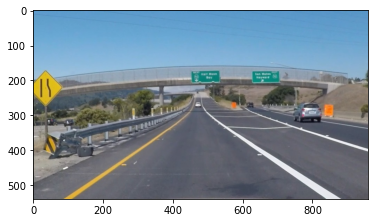

In [133]:
image = mpimg.imread('./data/exit-ramp.jpg')

plt.imshow(image)

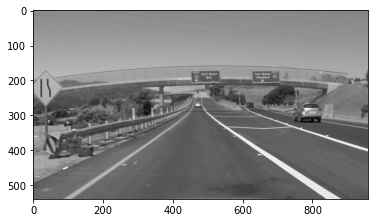

In [135]:
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.imshow(gray, cmap='gray')

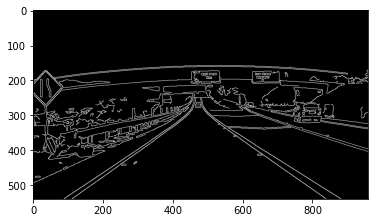

In [177]:
kernel_size = 5
blur_gray = cv2.GaussianBlur(gray, (kernel_size, kernel_size), 0)

low_threshold = 50
high_threshold = 150

edges = cv2.Canny(blur_gray, low_threshold, high_threshold)
plt.imshow(edges, cmap='Greys_r')

## Hough Transform

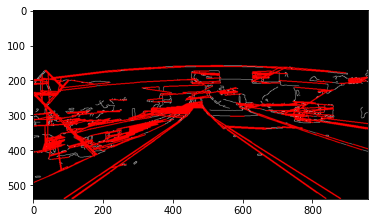

In [261]:
image = mpimg.imread('./data/exit-ramp.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

line_image = np.copy(image) * 0

kernel_size = 5
blur_gray = cv2.GaussianBlur(gray, (kernel_size, kernel_size), 0)

low_threshold = 50
high_threshold = 150

rho = 1
theta = np.pi/180
threshold = 15 # 직선으로 판단할 수 있는 허프공간에서의 교차점
min_line_length = 40
max_line_gap = 20

edges = cv2.Canny(blur_gray, low_threshold, high_threshold)
lines = cv2.HoughLinesP(edges, rho, theta, threshold, minLineLength=min_line_length, maxLineGap=max_line_gap)

color_edge = np.dstack((edges, edges, edges))

for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(color_edge, (x1, y1), (x2, y2), (255, 0, 0), 2)
    
plt.imshow(color_edge)

## ROI Selection and Hough Transform

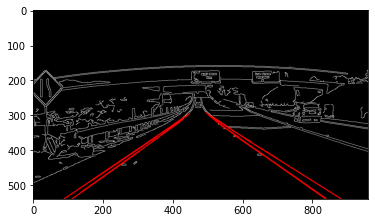

In [262]:
image = mpimg.imread('./data/exit-ramp.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

imshape = image.shape

kernel_size = 5
blur_gray = cv2.GaussianBlur(gray, (kernel_size, kernel_size), 0)

low_threshold = 50
high_threshold = 150

rho = 1
theta = np.pi/180
threshold = 15 
min_line_length = 40
max_line_gap = 20

edges = cv2.Canny(blur_gray, low_threshold, high_threshold)
mask = np.zeros(edges.shape, dtype=edges.dtype)
vertices = np.array([[(0,imshape[0]),(450, 290), (490, 290), (imshape[1],imshape[0])]], dtype=np.int32)
cv2.fillPoly(mask, vertices, 255)
masked_edges = cv2.bitwise_and(edges, mask)

lines = cv2.HoughLinesP(masked_edges, rho, theta, threshold, minLineLength=min_line_length, maxLineGap=max_line_gap)

edge_3d = np.dstack((edges, edges, edges))

for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(edge_3d, (x1, y1), (x2, y2), (255, 0, 0), 2)

plt.imshow(edge_3d)
plt.show()